In [6]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

In [7]:
%%time
feature = pd.read_csv('SCADA/features_T.csv')
cond = pd.read_csv('SCADA/condition_T.csv')
labels =pd.read_csv('SCADA/labels_T.csv')

CPU times: user 3.98 s, sys: 221 ms, total: 4.2 s
Wall time: 4.2 s


In [8]:
feature.describe()

,Unnamed: 0,Rotordrehzahl,Leistung,Generator_Umdr,T_Aussen,T_Gen1,T_Gen2,T_Getriebe,T_Getriebelager,T_Wellenlager,Drehmoment,Triebstrangbeschl,T_Generatorkuehlluft,T_Getriebelager_B
count,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06
mean,9.301910e+05,-1.504455e-11,-4.303942e-12,-2.431584e-13,-8.707261e-12,-7.306313e-13,3.746379e-12,5.459483e-15,4.313273e-12,4.313273e-12,-7.582819e-12,2.400482e-13,4.243789e-11,-4.355783e-11
std,5.370465e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000e+00,-1.685663e+00,-7.872065e-01,-1.689376e+00,-3.525746e+00,-3.613832e+00,-3.594264e+00,-4.969349e+00,-4.097301e+00,-4.097301e+00,-8.995342e-01,-1.062660e+00,-4.457798e+00,-1.581948e+00
25%,4.650955e+05,-9.167623e-01,-6.799460e-01,-9.179087e-01,-7.170903e-01,-4.680339e-01,-4.490256e-01,-3.185496e-01,-7.507164e-01,-7.507164e-01,-8.223838e-01,-6.915980e-01,-5.371061e-01,-1.536458e+00
50%,9.301910e+05,3.698993e-01,-3.581646e-01,3.725409e-01,-4.836268e-02,4.463793e-02,3.147546e-02,3.538551e-01,8.258304e-02,8.258304e-02,-3.150937e-01,-3.141386e-01,1.825154e-02,7.380879e-01
75%,1.395286e+06,5.109504e-01,2.087836e-01,5.107441e-01,7.541104e-01,5.126273e-01,5.004075e-01,4.659226e-01,7.552465e-01,7.552465e-01,4.532394e-01,4.109247e-01,6.145419e-01,7.380879e-01
max,1.860382e+06,1.780411e+00,5.219380e+00,1.756119e+00,4.900221e+00,6.028945e+00,6.153815e+00,3.875014e+00,3.432514e+00,3.432514e+00,5.878073e+00,1.598113e+01,5.494387e+00,9.655425e-01


In [9]:
labels.describe()

,Unnamed: 0,Fehler_051,Fehler_052,Fehler_071,Fehler_072,Fehler_077,Fehler_089,Fehler_098,Fehler_425
count,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06
mean,9.301910e+05,6.987808e-06,2.590864e-04,1.720076e-05,2.150095e-06,1.118049e-04,1.773828e-05,2.687619e-06,5.375237e-07
std,5.370465e+05,2.643438e-03,1.609408e-02,4.147345e-03,1.466319e-03,1.057320e-02,4.211648e-03,1.639394e-03,7.331601e-04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.650955e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.301910e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.395286e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.860382e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
print(cond[cond==1].count())
print(labels[labels==1].count())

cond_pos = cond

0.000000000000000000e+00    244
dtype: int64
Unnamed: 0      1
Fehler_051     13
Fehler_052    482
Fehler_071     32
Fehler_072      4
Fehler_077    208
Fehler_089     33
Fehler_098      5
Fehler_425      1
dtype: int64


In [12]:
feature.head()

,Unnamed: 0,Rotordrehzahl,Leistung,Generator_Umdr,T_Aussen,T_Gen1,T_Gen2,T_Getriebe,T_Getriebelager,T_Wellenlager,Drehmoment,Triebstrangbeschl,T_Generatorkuehlluft,T_Getriebelager_B
0,0,0.388821,-0.262396,0.372827,-0.182108,0.349576,0.333813,0.129720,0.253259,0.253259,-0.193027,-0.458352,0.314737,0.738088
1,1,0.390541,0.055554,0.372999,-0.243631,0.597289,0.568279,0.159978,0.253259,0.253259,0.294183,-0.358655,0.482893,0.738088
2,2,0.393981,0.101523,0.377180,-0.454949,0.575339,0.559795,0.241788,0.253259,0.253259,0.359708,-0.445023,0.293718,0.738088
3,3,0.414623,0.155153,0.397264,-0.583345,0.477352,0.467243,0.241788,0.253259,0.253259,0.425233,-0.330399,0.149900,0.738088
4,4,0.462787,0.247091,0.446921,-0.583345,0.380932,0.375462,0.309028,0.253259,0.253259,0.536731,-0.418366,0.025996,0.738088


In [13]:
print(labels['Fehler_052']==0)

0          True
1          True
2          True
3          True
4          True
           ... 
1860378    True
1860379    True
1860380    True
1860381    True
1860382    True
Name: Fehler_052, Length: 1860383, dtype: bool


In [14]:
print(feature.columns.values)
feature.describe()
feature.info()

['Unnamed: 0' 'Rotordrehzahl' 'Leistung' 'Generator_Umdr' 'T_Aussen'
 'T_Gen1' 'T_Gen2' 'T_Getriebe' 'T_Getriebelager' 'T_Wellenlager'
 'Drehmoment' 'Triebstrangbeschl' 'T_Generatorkuehlluft'
 'T_Getriebelager_B']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860383 entries, 0 to 1860382
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   Rotordrehzahl         float64
 2   Leistung              float64
 3   Generator_Umdr        float64
 4   T_Aussen              float64
 5   T_Gen1                float64
 6   T_Gen2                float64
 7   T_Getriebe            float64
 8   T_Getriebelager       float64
 9   T_Wellenlager         float64
 10  Drehmoment            float64
 11  Triebstrangbeschl     float64
 12  T_Generatorkuehlluft  float64
 13  T_Getriebelager_B     float64
dtypes: float64(13), int64(1)
memory usage: 198.7 MB


In [15]:
le = len(feature)

divide = int(le/2)
print(le, divide)

1860383 930191


In [16]:
# %%time
# split_data_1 = [feature.loc[i,:] for i in range(divide)]

In [17]:
def split(df, headSize) :
    hd = df.head(headSize)
    tl = df.tail(len(df)-headSize)
    return hd, tl

feature1, feature2 = split(feature, divide)

In [18]:
print(feature1.head())
len(feature1)

   Unnamed: 0  Rotordrehzahl  Leistung  Generator_Umdr  T_Aussen    T_Gen1  \
0           0       0.388821 -0.262396        0.372827 -0.182108  0.349576   
1           1       0.390541  0.055554        0.372999 -0.243631  0.597289   
2           2       0.393981  0.101523        0.377180 -0.454949  0.575339   
3           3       0.414623  0.155153        0.397264 -0.583345  0.477352   
4           4       0.462787  0.247091        0.446921 -0.583345  0.380932   

     T_Gen2  T_Getriebe  T_Getriebelager  T_Wellenlager  Drehmoment  \
0  0.333813    0.129720         0.253259       0.253259   -0.193027   
1  0.568279    0.159978         0.253259       0.253259    0.294183   
2  0.559795    0.241788         0.253259       0.253259    0.359708   
3  0.467243    0.241788         0.253259       0.253259    0.425233   
4  0.375462    0.309028         0.253259       0.253259    0.536731   

   Triebstrangbeschl  T_Generatorkuehlluft  T_Getriebelager_B  
0          -0.458352              0.3147

930191

In [19]:
feature1['Rotordrehzahl']>0.5

0         False
1         False
2         False
3         False
4         False
          ...  
930186    False
930187    False
930188    False
930189    False
930190    False
Name: Rotordrehzahl, Length: 930191, dtype: bool

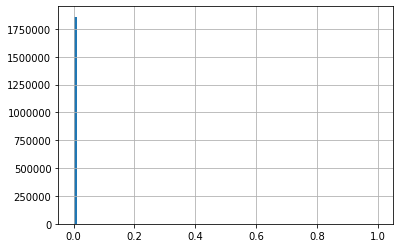

In [20]:
cond[cond.columns.values[0]].hist(bins=100)

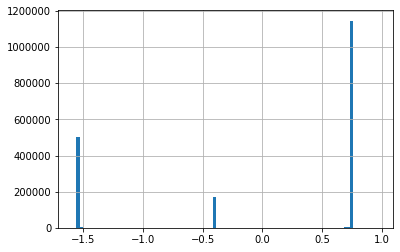

In [21]:
feature[feature.columns.values[13]].hist(bins=100)

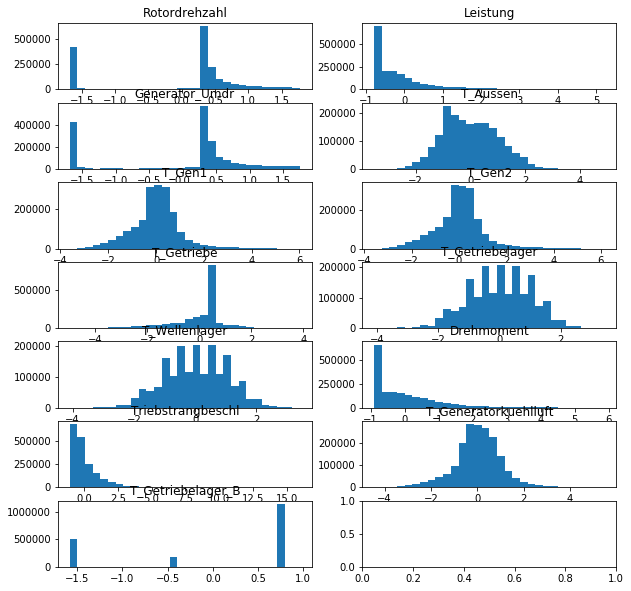

In [22]:
f,a = plt.subplots(7,2, figsize=(10,10))
a = a.ravel()
for idx,ax in enumerate(a):
    if idx >= 13:
        break
    #print(idx, ax)
    ax.hist(feature[feature.columns.values[idx+1]], bins=30)
    
    ax.set_title(feature.columns.values[idx+1])
    #ax.set_xlabel(xaxes[idx])
    #ax.set_ylabel(yaxes[idx])
    #plt.tight_layout()

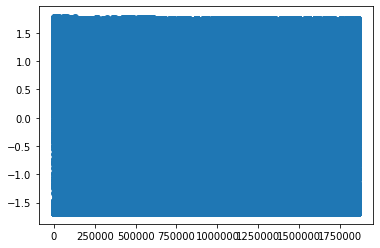

In [23]:
a,b=feature[feature.columns.values[0]],feature[feature.columns.values[1]]
plt.scatter(a,b)